# MODELOS DE REGRESSÃO PARA DADOS DE CONTAGEM
Os Modelos de regressão para dados de contagem tem por objetivo analisar o comportamento, em relação as variáveis preditoras, de uma variável dependente que se apresenta na forma quantitativa, discreta e com valores não negativos. É importante mencionar que o modelo de regressão inflacionado de zeros, cujos parâmetros podem ser estimados quando Y apresenta uma quantidade considerável dde contagem iguais a zero, faz parte dessa classe. Além disso, o modelo clássico de regressão linear não é adequado para esse caso, pois pode gerar estimadores viesados.

Ramalho(1996), diz que é comum iniciar os trabalhos com um modelo de regressão Poisson, devido a simplicidade. Nesse caso, a variável Y deve seguir distribuição Poisson com Média igual a variância. Porém na pratica, essa condição é violada devido a superdispersão (Causada pela presença de heterogeneidade nos dados), e nesse caso, utiliza-se o modelo de regressão binomial negativo. Os modelos Poisson e Binomial negativo são estimados por Máxima Verossimilhança.

Um exemplo de uso desses modelos é a quantidade de vezes que um grupo de pacientes idosos vai ao médico por ano, em função da idade, sexo, plano de saúde, entre outros. Ou a quantidade de ofertas públicas no ano em países emergentes. Ambos os casos a variável Y é discreta e não negativa, ou seja, dados de contagem.

## MODELO DE REGRESSÃO POISSON

O modelo de regressão Poisson, tem por objetivo, estudar uma variável dependente que apreseta valores discretos e não negativos (Dados de contagem). Para determinada observação i(i=1,2,...,n, n é o tamnho da amostra), possui probabilidade de ocorrência de uma contagem $m$ em dada exposição:

- $p(Y_{i}=m)=\frac{e^{-\lambda_{i}}*\lambda_{i}^{m}}{m!}$ , m=0,1,2...

Em que, $\lambda$ é o número de ocorrências ou a taxa média estimada de incidência do fenômeno em estudo para dada exposição. A partir dessa função é possível elaborar uma tabela de p em função dos valores m. 

Na distribuição Poisson, a **média e variância são iguais** a $\lambda$, caso esta propriedade conhecida como Equidispersão da distribuição for atendida, pode-se estimar um modelo de regressão Poisson, definido da seguinte forma funcional:

- $ln(Y_{i}=ln{\lambda_{i}}=\alpha+\beta_{1}*X_{1i}+\beta_{2}*X_{2i}+...+\beta_{k}*X_{ki})$

Conhecido como modelo Log-Lin(semi-logarítmo ou de semi-elasticidade). Caso a condição de equidispersão não seja atendida, e o modelo poison for estimado, os parâmetros estimados podem ser viesados devido a superdispersão/cauda longa. Logo, no modelo poisson o número esperado de ocorrências em dada exposição, para determinada observação i é descrito como:

- $\lambda=e^{(\alpha+\beta_{1}*X_{1i}+\beta_{2}*X_{2i}+...+\beta_{k}*X_{ki})}$

O modelo é estimado por Máxima Verossimilhança em que a variável dependente segue distribuição poisson. Logo pode-se definir a função de Verossimilhança sendo:
- $L=\prod_{i=1}^{n}\frac{e^{-\lambda_i}\ast\lambda_i^{Y_i}}{Y_i!}$

O logaritmo da função de verossimilhança (log likelihood function) é descrito como:

- $LL=\prod_{i=1}^{n}[-\lambda+(Y_{i})*ln(\lambda)-ln(Y_{i}!)]$

Desse modo, para obter os prâmetros do modelo proposto a função LL é máximizada.

In [1]:
import pandas as pd # manipulação de dado em formato de dataframe
import seaborn as sns # biblioteca de visualização de informações estatísticas
import matplotlib.pyplot as plt # biblioteca de visualização de dados
import statsmodels.api as sm # biblioteca de modelagem estatística
import numpy as np # biblioteca para operações matemáticas multidimensionais
from scipy import stats
from statsmodels.iolib.summary2 import summary_col
from math import exp, factorial
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('/content/drive/MyDrive/1- USP ESALQ/2- Módulo 1/2- SUPERVISED MACHINE LEARNING/03 - Análise de Modelos para Dados de Contagem/corruption.csv',
                 sep=',')
data.info()
data.head(5)
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     298 non-null    object 
 1   code        298 non-null    object 
 2   violations  298 non-null    int64  
 3   staff       298 non-null    int64  
 4   post        298 non-null    object 
 5   corruption  298 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 14.1+ KB


,violations,staff,corruption
count,298.000000,298.000000,298.000000
mean,6.496644,11.805369,0.013641
std,18.210377,11.079558,1.012474
min,0.000000,2.000000,-2.582988
25%,0.000000,6.000000,-0.415147
50%,0.000000,9.000000,0.326959
75%,3.000000,14.000000,0.720250
max,167.000000,86.000000,1.582807


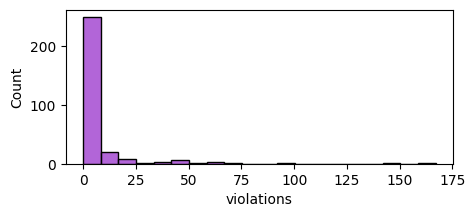

In [ ]:
# frequência
contagem = data['violations'].value_counts(dropna=False)
percent = data['violations'].value_counts(dropna=False, normalize=True)
#pd.concat([contagem, percent], axis=1, keys=['contagem', '%'], sort=True) #frequências em tabela
plt.figure(figsize=(5,2))
sns.histplot(data=data, x="violations", bins=20, color='darkorchid')
plt.show()

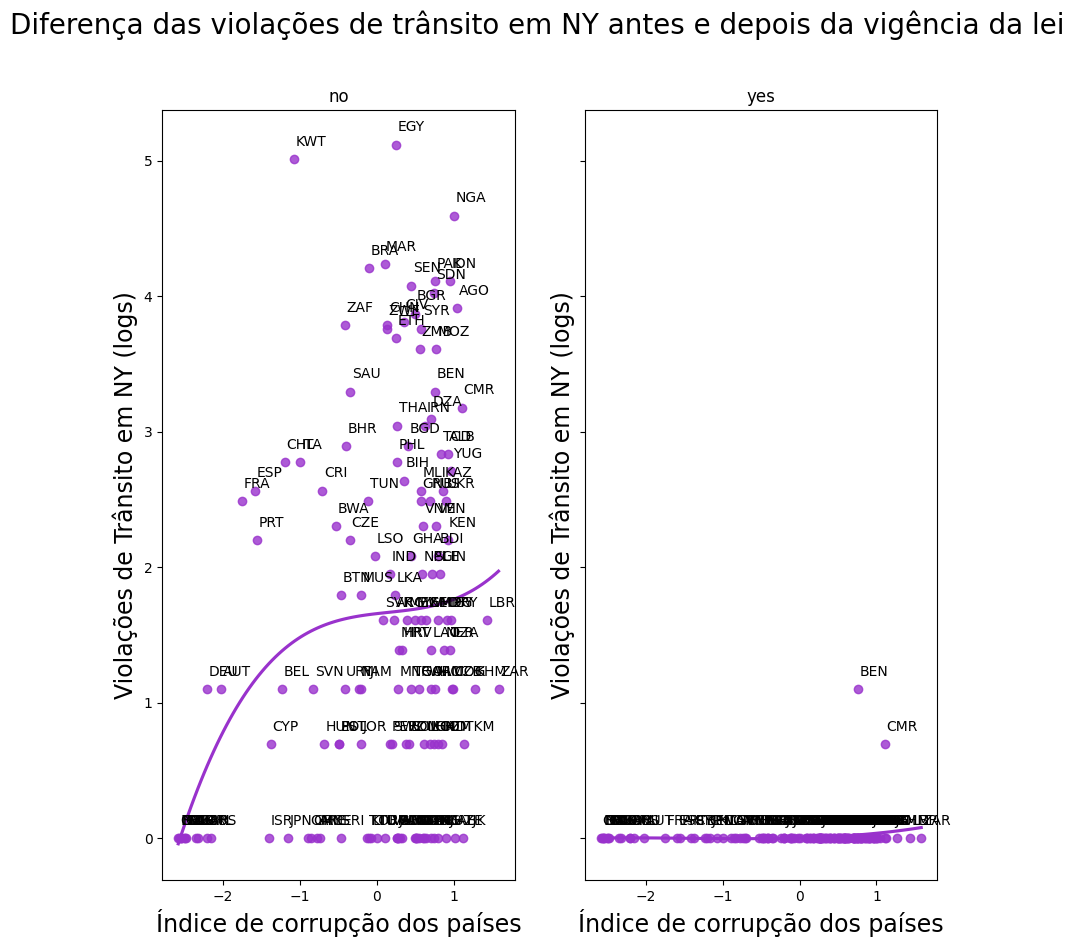

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(10,10), sharey=True)
fig.suptitle('Diferença das violações de trânsito em NY antes e depois da vigência da lei',
             fontsize = 20)

post = ['no','yes']

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y']+.1, str(point['val']))

for i, v in enumerate(post):
    df = data[data.post==v]
    df['violations'] = np.log(df.violations)
    df.loc[df['violations']==np.inf, 'violations'] = 0
    df.loc[df['violations']==-np.inf, 'violations'] = 0
    sns.regplot(data=df, x='corruption', y='violations',order=3, ax=axs[i],
                ci=False, color='darkorchid')
    axs[i].set_title(v)
    axs[i].set_ylabel("Violações de Trânsito em NY (logs)", fontsize = 17)
    axs[i].set_xlabel("Índice de corrupção dos países", fontsize = 17)
    label_point(df.corruption, df.violations, df.code, axs[i])  

plt.show()

### Avaliação do modelo
Para saber se há ganho estatístico em relação a um modelo nulo, utiliza-se o Pseudo R² (Utilizado para escolher um modelo em detrimento de outro), dado por:

- $Pseudo R²=\frac{-2LL_{0}-(-2LL_{max})}{-2LL_{0}}$

O teste de significância geral é dado pelo teste $\chi^2$ que verifica se $H_{0}: \beta_{1}=\beta_{2}=...=\beta_{k}=0$, e $H_{1}:$ Existe ao menos um $\beta_{j}<>0$. A estatísitca é dada por $\chi^2=-2(LL_{0}-LL_{max})$ com Graus de liberdade igual ao número de variáveis explicativas.

Para avaliar individualmente os parâmetros do modelo, utiliza-se a estatística z de Wald em que $H_{0}: \beta=0$ e $H_{1}<>0$. A estatística de teste é dada por $z_{\beta}=\frac{\beta}{s.e(\beta)}$

In [3]:
#estimação de um modelo Poisson
poisson_model= smf.glm(formula='violations ~ staff + post + corruption',
                         data=data,
                         family=sm.families.Poisson()).fit()

#Parâmetros do modelo
poisson_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             violations   No. Observations:                  298
Model:                            GLM   Df Residuals:                      294
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2071.8
Date:                Mon, 03 Apr 2023   Deviance:                       3644.0
Time:                        12:57:18   Pearson chi2:                 6.77e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.9999
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.2127      0.031     71.134      0.000       2.152       2.274
post[T.yes]    -4.2968      0.197    -21.762      0.000      -4.684      -3.910
staff           0.0219      0.001     17.807      0.000       0.019       0.024
corruption      0.3418      0.027     12.430      0.000       0.288       0.396
===============================================================================
"""

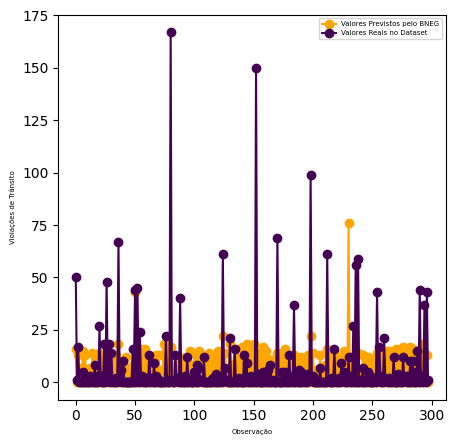

In [18]:
#Gráfico para comparar os valores previstos x valores reais
poisson_predictions = poisson_model.predict(data[['staff','post','corruption']])
predicted_counts = np.round(poisson_predictions)
actual_counts = data['violations']

plt.figure(figsize=(5,5))
plt.plot(data.index, predicted_counts, 'go-',
         color='orange')
plt.plot(data.index, actual_counts, 'go-',
         color='#440154FF')
plt.xlabel('Observação', fontsize=5)
plt.ylabel('Violações de Trânsito', fontsize=5)
plt.legend(['Valores Previstos pelo BNEG', 'Valores Reais no Dataset'],
           fontsize=5)
plt.show()

### Teste de superdispersão
Cameron e Trivedi (1990) Propõem um procedimento para verificação da existência de superdisperção em modelos de regressão Poisson. Para tanto é preciso que seja gerada uma variável $Y^*$ do seguinte modo:

- $Y^{*}=\frac{[(Y_{i}-\lambda_{i})^{2}-Y_{i}]}{\lambda_{i}}$

Em que \lambda é o número esperado de ocorrências para cada observação após a estimação do modelo de regressão Poisson, e $(Y_{i}-\lambda)$ é a diferença entre o número real de ocorrências e o número previsto de ocorrências para cada observação (equivalente a um termo de erro em regressão linear).

Após a geração de $Y^{*}$, estima-se um modelo auxiliar de regressão simples sem a constante:

- $\hat{Y^{*}}=\beta*\lambda_{i}$

Caso ocorra o fenômeno da superdispersão nos dados, o parâmetro $\beta$ estimado por meio do modelo auxiliar será estatisticamente diferente de zero a um determinado nível de significância.

In [ ]:
#CAMERON, A. C.; TRIVEDI, P. K. Regression-based tests for overdispersion in
#the Poisson model. Journal of Econometrics, v. 46, n. 3, p. 347-364, 1990.

#1º Passo: estimar um modelo Poisson;
#2º Passo: criar uma nova variável (Y*) utilizando os fitted values do modelo
#Poisson estimado anteriormente;
#3º Passo: estimar um modelo auxiliar OLS, com a variável Y* como variável
#dependente, os fitted values do modelo Poisson como única variável preditora e 
#sem o intercepto;
#4º Passo: Observar a significância do parâmetro beta.

def cameron_trivedi(model,y_name,data):
  df=data
  df['lambda_poisson']= model.fittedvalues
  df['ystar'] = (((df[y_name]-df['lambda_poisson'])**2)-df[y_name])/df['lambda_poisson']
  modelo_auxiliar = smf.ols(formula='ystar ~ 0 + lambda_poisson',
                          data=df).fit()
  ct_t_value=float(modelo_auxiliar.tvalues)
  ct_p_value=float(modelo_auxiliar.pvalues)

  return print('Cameron e Trivedi Test (1990)',
               '\n T-value:', round(ct_t_value,4),
               '| P-value: ', round(ct_p_value,4),
               '\n H0: verifica-se a existência de equidispersão nos dados')

In [ ]:
#Verificação superdispersão
print(pd.DataFrame({'Média':[data['violations'].mean()],
              'Variância':[data['violations'].var()]}),'\n')

cameron_trivedi(poisson_model,y_name='violations',data=data)

      Média   Variância
0  6.496644  331.617834 

Cameron e Trivedi Test (1990) 
 T-value: 2.7538 | P-value:  0.0063 
 H0: verifica-se a existência de equidispersão nos dados


## Regressão Binomial Negativa
O modelo Binomial negativo é utilizado para dados de contagem. Sendo útil quando a variável de interesse possui valores inteiros e não negativos. Porém quando houver indícios de superdispersão. A distribuição é uma combinação de duas distribuições para levar em consideração o fenômeno da superdispersão.

A média da distribuiçao Poisson-gama é dada por:

- $\lambda=u_{i}*V_{i}$

Em que o primeiro termo $u_{i}$ representa o valor esperado de ocorrências e possui distribuição Poisson e o segundo $V_{i}$ corresponde à parcela aleatória do número de ocorrências e possui uma distribuição Gama.
A função de distribuição de probabilidade da variável V_{i} é dada por:

- $p(v_{i})=\frac{\delta^{\psi}*V_{i}^{\psi-1}*e{-V_{i}*\delta}}{\Gamma(\psi)}$ , $V_{i}=0,1,2..$

em que $\psi$ é chamado de parâmetro de forma ($\psi>0$), $\delta$ é chamado de parâmetro de taxa, $\Gamma(\psi)$ pode ser aproximado por $(\psi-1)!$. Transformando a função de distribuição da proabilidade gamma como uma função do valor esperado de ocorrências da distribuição Poisson $(U_{i})$ de modo que:

- $p(u_{i})=\frac{(\frac{\psi}{u_{i}})^{\psi}*\lambda_{i}^{\psi-1}*e{-\frac{\lambda_{i}}{u_{i}}*\delta}}{\Gamma(\psi)}$

- Média: $E(Y)=u$
- Variância: $Var(Y)=u+\phi*u^{2}$ , 

em que $\phi=\frac{1}{\psi}$ e representa a superdispersão. Caso $\phi$ seja estatísticamente maior que zero, a existência da superdispersão faz com que deva ser estimado um modelo de regressão Binomial Negativo (Poisson-Gama).

O parâmetro $\phi$ é estimado juntamente com os parâmetros do modelo de regressão binomial negativo pela maximização do somatório do logaritmo da função de verossimilhança. Consiste no modelo de regressão NB2 (negative binomial 2 regression model), devido a especificação quadrática da variância.
A especificação do modelo é dada por:

$u_{i}=e^{(\alpha+\beta_{1}X_{1}+\beta_{2}X_{2}+...+\beta_{k}X_{k}+)}$
Pode-se escrever o logaritmo da função de verossimilhança (log likelihood) de um modelo NB2 é dada por:

- $LL=\sum_{i=1}^{n}\left[Y_iln\left(\frac{\phi u_{i}} {1+\phi u_{i}}\right)-\frac{ln\left(1+\phi u_{i} \right)}{\phi}+ln\Gamma\left(Y_i+\phi^{-1}\right)-ln\Gamma\left(Y_i+1\right)-ln\Gamma\left(\phi^{-1}\right)\right]$


Utilizando a programação linear para maximizar a função $LL$ é possível estimar os parâmetros $\phi,\alpha,\beta_{1},\beta_{2}...,,\beta_{k}$ de modo que $\phi>0$


In [15]:
#O argumento 'family=sm.families.NegativeBinomial(alpha=2.0963)' da função
#'smf.glm' define a estimação de um modelo binomial negativo do tipo NB2
#com valor de 'fi' ('alpha' no Python) igual a 2.0963. Lembramos que 'fi' é o
#inverso do parâmetro de forma 'theta' da distribuição Poisson-Gama.

bneg_model = smf.glm(formula='violations ~ staff + post + corruption',
                      data=data,
                      family=sm.families.NegativeBinomial(alpha=2.0963)).fit()

#Parâmetros do modelo
bneg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             violations   No. Observations:                  298
Model:                            GLM   Df Residuals:                      294
Model Family:        NegativeBinomial   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -567.40
Date:                Mon, 03 Apr 2023   Deviance:                       239.13
Time:                        13:02:15   Pearson chi2:                     466.
No. Iterations:                    18   Pseudo R-squ. (CS):             0.6714
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.9469      0.162     12.050      0.000       1.630       2.264
post[T.yes]    -4.2746      0.266    -16.071      0.000      -4.796      -3.753
staff           0.0400      0.009      4.497      0.000       0.023       0.057
corruption      0.4527      0.115      3.950      0.000       0.228       0.677
===============================================================================
"""

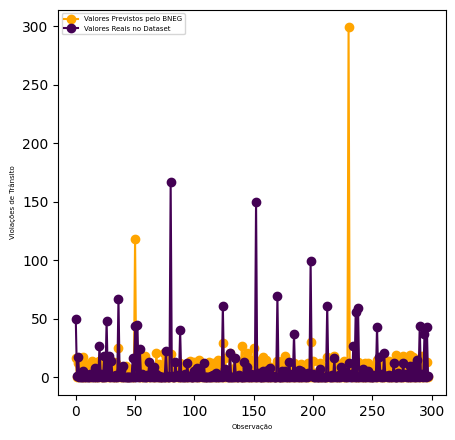

In [17]:
#Gráfico para comparar os valores previstos x valores reais
bneg_predictions = bneg_model.predict(data[['staff','post','corruption']])
predicted_counts = np.round(bneg_predictions)
actual_counts = data['violations']

plt.figure(figsize=(5,5))
plt.plot(data.index, predicted_counts, 'go-',
         color='orange')
plt.plot(data.index, actual_counts, 'go-',
         color='#440154FF')
plt.xlabel('Observação', fontsize=5)
plt.ylabel('Violações de Trânsito', fontsize=5)
plt.legend(['Valores Previstos pelo BNEG', 'Valores Reais no Dataset'],
           fontsize=5)
plt.show()

In [ ]:
# In[ ]: Comparando os modelos Poisson e binomial negativo

summary_col([poisson_model, bneg_model], 
            model_names=["Poisson","BNeg"],
            stars=True,
            info_dict = {
                'N':lambda x: "{0:d}".format(int(x.nobs)),
                'Log-lik':lambda x: "{:.2f}".format(x.llf),
                'Pseudo-R2':lambda x: "{:.4f}".format(x.pseudo_rsquared()),
        })

,Poisson,BNeg
Intercept,2.2127***,1.9469***
,(0.0311),(0.1616)
post[T.yes],-4.2968***,-4.2746***
,(0.1974),(0.2660)
staff,0.0219***,0.0400***
,(0.0012),(0.0089)
corruption,0.3418***,0.4527***
,(0.0275),(0.1146)
N,298,298
Log-lik,-2071.79,-567.40


In [ ]:
#likelihood ratio test para comparação de LL's entre modelos
def lrtest(modelos):
    modelo_1 = modelos[0]
    llk_1 = modelo_1.llnull
    llk_2 = modelo_1.llf
    
    if len(modelos)>1:
        llk_1 = modelo_1.llf
        llk_2 = modelos[1].llf
    LR_statistic = -2*(llk_1-llk_2)
    p_val = stats.chi2.sf(LR_statistic, 1)
    return round(LR_statistic,4), round(p_val,4)

lrtest([poisson_model, bneg_model])

(3008.7852, 0.0)

# MODELOS ZERO INFLATED

A quantidade excessiva de zeros, pode fazer com que os parâmetros estimados pelos modelos Poisson e Poisson-Gama, sejam viesados por não conseguir capturar a presença exarcebada de contagens nulas. Nesse contexto podem ser utilizados modelos inflacionados de zero (Zero-Inflated).

Nesse sentido, de acordo com Lambert (1992), esses modelos são considerados uma combinação entre modelo para dados de contagem e um modelo para dados binários, uma vez que são utilizados para determinar as razões que levam a determinada quantidade de ocorrências ou razões de um fenômeno da quantidade de contagens observadas.

A determinação da exitência de quantidade excessiva de zeros na variável Y é dada pelo teste de Vuong(1989).

## ZERO INFLATED POISSON MODEL
É estimado a partir da combinação de uma distribuição de Bernoulli com uma distribuição Poisson. A probabilidade p de ocorrência de nenhuma contagem para observação i, ou seja, $p(Y_{i}=0)$, é calculada levando em consideração a soma de um componente dicotômico e um componente de contagem.

Defini-se a probabilidade $P_{logit_{i}}$ de não ocorrer nenhuma contagem devido exclusivamente ao componente dicotômico, a probabilidade de ocorrência de determinada contagem $m(m=1,2,...,n)$, ou seja, $P(Y_{i}=m)$ segue a expreção de probabilidade da distribuição Poisson, multiplicada por (1-$P_{logit_{i}}$), logo tem-se:

- $P\left(Y_i=0\right)=P_{{\rm logit}_i}+\left(1-P_{{\rm logit}_i}\right)e^{-\lambda}$
- $P(Y_{i}=m)=(1-P_{{\rm logit}_i})*\frac{e^{-\lambda_{i}}*\lambda_{i}^{m}}{m!}$

Sendo $Y$~$ZIP(\lambda,P_{logit_{i}})$, logo:

- $P_{logit_{i}}=\frac{1}{1+e^{-(\gamma+\delta_{1}*W_{1i}+\delta_{2}*W_{2i}+...+\delta_{q}*W_{qi})}}$
- $\lambda_{i}=e^{(\alpha+\beta_{1}X_{1i}+\beta_{2}X_{2i}+...+\beta_{k}X_{ki})}$

Logo, esse modelo apresenta dois processos geradores de zero, o primeiro devido a distribuição binária (Zero estruturais) e o segundo devido a dados de contagem (Zeros amostrais). 

Define-se que, quando a ocorrência de zeros estruturais é influenciada por um vetor de variáveis explicativas $W_{q}$, a ocorrência de determinada contagem m é influenciada por um vetor de variáveis $X_{k}$. É possível inserir a mesma variável nos dois vetores para investigar se essa variável influência concomitantemente a ocorrência do evento, e em caso afirmativo, a quantidade de ocorrências do referido fenômeno.

A partir da expreção supracitada, defini-se a função log likelihood utilizada para encontrar os parâmetros estimados é dado por:

- $LL=\prod_{Y_{i}=0}^ln[P_{logit_{i}}+(1-P_{logit_{i}})e^{-\lambda}] + \prod_{Y_{i}>0}[ln(1-P_{logit_{i}})-\lambda_{i}+(Y_{i})ln(\lambda_{i})-ln(Y_{i}!)]$


In [4]:
#Definição da variável dependente (voltando ao dataset 'df_corruption')
y = data['violations']

#Definição das variáveis preditoras que entrarão no componente de contagem
x1 = data[['staff','post','corruption']]
X1 = sm.add_constant(x1)

#Definição das variáveis preditoras que entrarão no componente logit (inflate)
x2 = data[['corruption']]
X2 = sm.add_constant(x2)

#Se estimarmos o modelo sem dummizar as variáveis categórias, o modelo retorna
#um erro
X1 = pd.get_dummies(X1, columns=['post'], drop_first=True)

#Estimação do modelo ZIP pela função 'ZeroInflatedPoisson' do pacote
#'Statsmodels'

#Estimação do modelo ZIP
#O argumento 'exog_infl' corresponde às variáveis que entram no componente
#logit (inflate)
zip_model = sm.ZeroInflatedPoisson(y, X1, exog_infl=X2,
                                    inflation='logit').fit()

#Parâmetros do modelo
zip_model.summary()

Optimization terminated successfully.
         Current function value: 5.977545
         Iterations: 22
         Function evaluations: 27
         Gradient evaluations: 27


<class 'statsmodels.iolib.summary.Summary'>
"""
                     ZeroInflatedPoisson Regression Results                    
===============================================================================
Dep. Variable:              violations   No. Observations:                  298
Model:             ZeroInflatedPoisson   Df Residuals:                      294
Method:                            MLE   Df Model:                            3
Date:                 Mon, 03 Apr 2023   Pseudo R-squ.:                  0.1975
Time:                         12:57:19   Log-Likelihood:                -1781.3
converged:                        True   LL-Null:                       -2219.8
Covariance Type:             nonrobust   LLR p-value:                8.828e-190
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
inflate_const         -1.6116      0.240     -6.714      0.000      -2.082      -1.141
inflate_corruption    -0.9523      0.195     -4.875      0.000      -1.335      -0.569
const                  2.4889      0.032     78.990      0.000       2.427       2.551
staff                  0.0200      0.001     16.154      0.000       0.018       0.022
corruption             0.0937      0.030      3.127      0.002       0.035       0.152
post_yes              -4.2879      0.201    -21.291      0.000      -4.683      -3.893
======================================================================================
"""

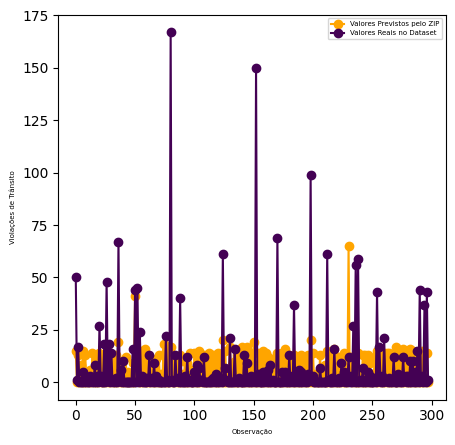

In [13]:
#Gráfico para comparar os valores previstos x valores reais
zip_predictions = zip_model.predict(X1, exog_infl=X2)
predicted_counts = np.round(zip_predictions)
actual_counts = data['violations']

plt.figure(figsize=(5,5))
plt.plot(data.index, predicted_counts, 'go-',
         color='orange')
plt.plot(data.index, actual_counts, 'go-',
         color='#440154FF')
plt.xlabel('Observação', fontsize=5)
plt.ylabel('Violações de Trânsito', fontsize=5)
plt.legend(['Valores Previstos pelo ZIP', 'Valores Reais no Dataset'],
           fontsize=5)
plt.show()

## ZERO INFLATED NEGATIVE BINOMIAL

É estimado a partir da combinação de uma distribuição bernoulli e Poisson-Gama.
- $P\left(Y_i=0\right)=P_{{\mathrm{logit}}_i}+\left(1-P_{{\mathrm{logit}}_i}\right)\left(\frac{1}{1+\phi u_{i}}\right)^\frac{1}{\phi}$
- $P\left(Y_i=m\right)=\left(1-P_{{\mathrm{logit}}_i}\right)[\binom{m+\phi^{-1}-1}{\phi^{-1}-1}\left(\frac{1}{1+\phi u_{i}}\right)^\frac{1}{\phi} \left (\frac{\phi u_{i}}{\phi u_{i}+1}\right)^{m}]$


Em que $\phi$ representa o inverso do parâmetro de forma determinado de determinada distribuição Gama, enquanto $P_{logit_{i}}=\frac{1}{1+e^{-(\gamma+\delta_{1}*W_{1i}+\delta_{2}*W_{2i}+...+\delta_{q}*W_{qi})}}$.

Portanto, se $P_{logit_{i}}=0$ a distribuição de probabilidade assume a distribuição Poisson-Gama, incluindo casos em que $Y_{i}=0$. Logo, modelos de regressão Zero Inflated Negative Binomial apresenta dois processos geradores de zero, oriundos da distribuição binária e da distribuição Poisson-Gama.

A partir da FDP supracitada é possível chegar a log likelihood function, que tem o intuito de estimar os parâmetros $\phi,\alpha,\beta_{1},\beta_{2}...,,\beta_{k}$ e $\gamma, \delta_{1}, \delta_{2},...,\delta_{k}$:

- $ LL= \sum_{Y_{i}=0} ln[P_{{\mathrm{logit}}_i}+\left(1-P_{{\mathrm{logit}}_i}\right)\left(\frac{1}{1+\phi u_{i}}\right)^\frac{1}{\phi}]+\sum_{Y_{i}>0}[ln(1-P_{{\mathrm{logit}}_i})+Y_{i}*ln(\frac{\phi u_{i}}{1+\phi u_{i}})-\frac{ln(1+\phi u_{i})}{\phi}+ln\Gamma\left(Y_i+\phi^{-1}\right)-ln\Gamma\left(Y_i+1\right)-ln\Gamma\left(\phi^{-1}\right)] $

In [23]:
#Definição da variável dependente (voltando ao dataset 'df_corruption')
y = data['violations']

#Definição das variáveis preditoras que entrarão no componente de contagem
x1 = data[['staff','post','corruption']]
X1 = sm.add_constant(x1)

#Definição das variáveis preditoras que entrarão no componente logit (inflate)
x2 = data[['corruption']]
X2 = sm.add_constant(x2)

#Se estimarmos o modelo sem dummizar as variáveis categórias, o modelo retorna
#um erro
X1 = pd.get_dummies(X1, columns=['post'], drop_first=True)

#Estimação do modelo ZINB pela função 'ZeroInflatedNegativeBinomialP' do
#pacote 'statsmodels.discrete.count_model'

from statsmodels.discrete.count_model import ZeroInflatedNegativeBinomialP

#Estimação do modelo ZINB
#O argumento 'exog_infl' corresponde às variáveis que entram no componente
#logit (inflate)
zinb_model = ZeroInflatedNegativeBinomialP(y, X1, exog_infl=X2,
                                            inflation='logit').fit()

#Parâmetros do modelo
zinb_model.summary()

         Current function value: 1.872522
         Iterations: 35
         Function evaluations: 39
         Gradient evaluations: 39


<class 'statsmodels.iolib.summary.Summary'>
"""
                     ZeroInflatedNegativeBinomialP Regression Results                    
=========================================================================================
Dep. Variable:                        violations   No. Observations:                  298
Model:             ZeroInflatedNegativeBinomialP   Df Residuals:                      295
Method:                                      MLE   Df Model:                            2
Date:                           Mon, 03 Apr 2023   Pseudo R-squ.:                  0.1689
Time:                                   13:07:22   Log-Likelihood:                -558.01
converged:                                 False   LL-Null:                       -671.37
Covariance Type:                       nonrobust   LLR p-value:                 5.847e-50
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
inflate_const        -17.8589      9.103     -1.962      0.050     -35.700      -0.018
inflate_corruption    -8.1162      3.978     -2.040      0.041     -15.913      -0.319
const                  2.1019      0.196     10.741      0.000       1.718       2.485
staff                  0.0388      0.013      2.989      0.003       0.013       0.064
post_yes              -4.2614      0.261    -16.315      0.000      -4.773      -3.750
alpha                  1.8619      0.218      8.524      0.000       1.434       2.290
======================================================================================
"""

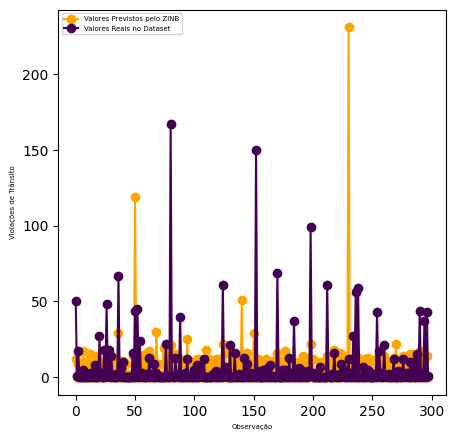

In [24]:
#Gráfico para comparar os valores previstos x valores reais
zinb_predictions = zinb_model.predict(X1, exog_infl=X2)
predicted_counts = np.round(zinb_predictions)
actual_counts = data['violations']

plt.figure(figsize=(5,5))
plt.plot(data.index, predicted_counts, 'go-',
         color='orange')
plt.plot(data.index, actual_counts, 'go-',
         color='#440154FF')
plt.xlabel('Observação', fontsize=5)
plt.ylabel('Violações de Trânsito', fontsize=5)
plt.legend(['Valores Previstos pelo ZINB', 'Valores Reais no Dataset'],
           fontsize=5)
plt.show()

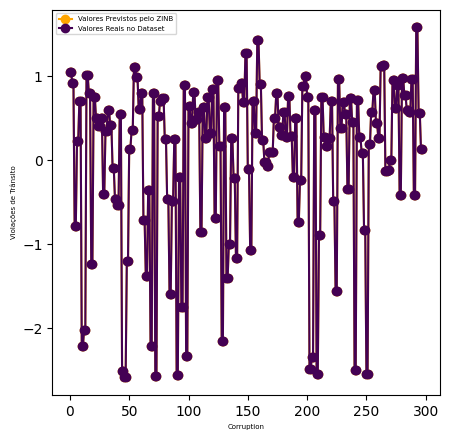

In [26]:
#Gráfico para comparar os valores previstos x valores reais
zinb_predictions = zinb_model.predict(X1, exog_infl=X2)
predicted_counts = np.round(zinb_predictions)
actual_counts = data['violations']

plt.figure(figsize=(5,5))
plt.plot(data.index, data[['corruption']], 'go-',
         color='orange')
plt.plot(data.index,  data[['corruption']], 'go-',
         color='#440154FF')
plt.xlabel('Corruption', fontsize=5)
plt.ylabel('Violações de Trânsito', fontsize=5)
plt.legend(['Valores Previstos pelo ZINB', 'Valores Reais no Dataset'],
           fontsize=5)
plt.show()